In [ ]:
---
title: Invariant Manifolds in Circular Restricted Three Body Dynamics

format:
    arxiv-pdf: default

execute:
    echo: false
    output: true
---

In [1]:
#| echo: false
#| output: false
using Plots
using ModelingToolkit
using AstrodynamicalModels
using AstrodynamicalCalculations
using GeneralAstrodynamics
using DifferentialEquations

using SPICEKernels, SPICEBodies, SPICE
furnsh(
    de440(),                    
    latest_leapseconds_lsk(),   
    gm_de440(),                 
    pck00011(),
    jup344(),
)

## CR3BP Dynamics

The Circular Restricted Three Body Problem is a set of assumptions, and corresponding 
equations, which somewhat accurately models the space near two gravitational bodies.


In [2]:
model = structural_simplify(
    CR3BP()
)

Model CR3BP with 6 equations
States (6):
  x(t)
  y(t)
  z(t)
  ẋ(t)
⋮
Parameters (1):
  μ
Incidence matrix:6×12 SparseArrays.SparseMatrixCSC{Num, Int64} with 20 stored entries:
 ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ⋅  ⋅  ⋅
 ×  ×  ×  ⋅  ×  ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅
 ×  ×  ×  ×  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ×  ⋅
 ×  ×  ×  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ×

## Halo Orbits

Periodic orbits about stationary points in CR3BP dynamics are known as halo orbits. 

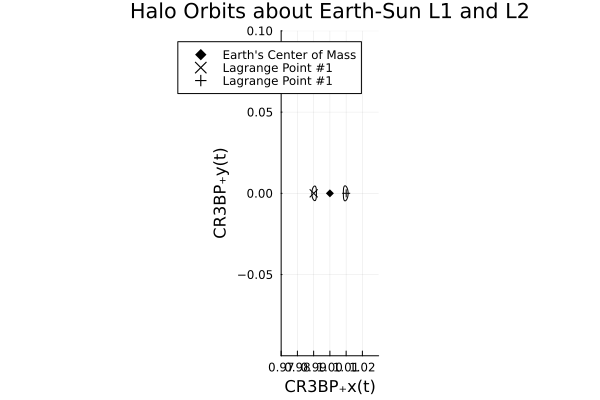

In [8]:
#| label: fig-halo
#| fig-cap: Halo Orbits about Earth-Moon L1 and L2.

let μₑ = gm("earth"), μₛ = gm("sun"), μ = reduced_mass(μₑ, μₛ)

    r₁, v₁, τ₁ = halo(μ, Az = 0.001, L=1)
    r₂, v₂, τ₂ = halo(μ, Az = 0.001, L=2)

    t₁ = let 
        problem = ODEProblem(model, vcat(r₁, v₁), (0, τ₁), (μ,))
        solve(problem, reltol=1e-12, abstol=1e-12)
    end

    t₂ = let 
        problem = ODEProblem(model, vcat(r₂, v₂), (0, τ₂), (μ,))
        solve(problem, reltol=1e-12, abstol=1e-12)
    end

    figure = plot(t₁; vars = (:x, :y), color = :black, linestyle = :solid, linewidth = 1, label=:none, aspect_ratio=1)
    plot!(t₂; vars=(:x, :y), color = :black, linestyle = :solid, linewidth = 1, label=:none, aspect_ratio=1)


    let xyz = secondary_synodic_position(μ)
        x, y, z = xyz
        scatter!([x], [y]; markersize=4, color = :black, marker = :diamond, label="Earth's Center of Mass")
    end

    let xyz = lagrange_point(μ, 1)
        x, y, z = xyz
        scatter!([x], [y]; markersize=4, color = :black, marker = :x, label="Lagrange Point #1")
    end

    let xyz = lagrange_point(μ, 2)
        x, y, z = xyz
        scatter!([x], [y]; markersize=4, color = :black, marker = :+, label="Lagrange Point #1")
    end

    plot!(; xlim=(0.97, 1.03), ylim=(-0.1, 0.1), title="Halo Orbits about Earth-Sun L1 and L2")
    figure 
end